#  Supervised Learning

## Image recognition with Support Vector Machines

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print faces.DESCR

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [3]:
print faces.keys()

['images', 'data', 'target', 'DESCR']


In [4]:
print faces.images.shape

(400, 64, 64)


In [5]:
print faces.data.shape

(400, 4096)


In [6]:
print faces.target.shape

(400,)


In [7]:
print np.max(faces.data)

1.0


In [8]:
print np.min(faces.data)

0.0


In [9]:
print np.mean(faces.data)

0.547043


In [10]:
# Data does not normalizing
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1,
                        hspace = 0.05, wspace = 0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

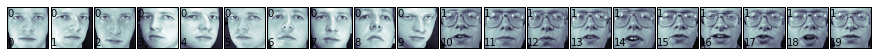

In [13]:
print_faces(faces.images, faces.target, 20)

## Training a Support Vector Machine

In [2]:
from sklearn.svm import SVC

In [15]:
svc_1 = SVC(kernel='linear') # default kernel is rbf kernel used to model nonlinear problems


In [3]:
from sklearn.cross_validation import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, 
                                                   faces.target, test_size=0.25, random_state=0)

In [4]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print("Mean score: {0:.3f} (+/-{1:.3f}").format(np.mean(scores), sem(scores))

In [24]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012


In [5]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)
    
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    
    y_pred = clf.predict(X_test)
    
    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(y_test, y_pred)

In [30]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19    

In [31]:
# Try classifying faces as people with and without glasses
# the index ranges of images of people with glasses
glasses = [
    (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
    (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)]


In [33]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in teh specified segments
    for (start, end) in segments:
        y[start:end+1] = 1
    return y
target_glasses = create_target(glasses)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses,
                                                   test_size=0.25, random_state=0)

In [35]:
svc_2 = SVC(kernel='linear')

In [36]:
evaluate_cross_validation(svc_2, X_train, y_train, 5)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score: 0.970 (+/-0.012


In [37]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


In [39]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]
print y_test.shape[0]

10


In [40]:
select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]
print y_train.shape[0]

390


In [45]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


In [47]:
# Check the single error above
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]

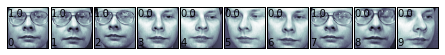

In [48]:
print_faces(eval_faces, y_pred, 10)

## Text Classification with Naive Bayes

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

No handlers could be found for logger "sklearn.datasets.twenty_newsgroups"


In [8]:
news.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']

In [13]:
news.description

'the 20 newsgroups by date dataset'

In [14]:
print type(news.data), type(news.target), type(news.target_names)

<type 'list'> <type 'numpy.ndarray'> <type 'list'>


In [15]:
print news.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [16]:
print len(news.data)

18846


In [17]:
print len(news.target)

18846


In [18]:
print news.data[0]

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [19]:
print news.target[0], news.target_names[news.target[0]]

10 rec.sport.hockey


### Preprocessing the data

In [20]:
SPLIT_PERC = 0.75
split_size = int(len(news.data)*SPLIT_PERC)
X_train = news.data[:split_size]
X_test = news.data[split_size:]
y_train = news.target[:split_size]
y_test = news.target[split_size:]

### Training a Naive Bayes classifier

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer

clf_1 = Pipeline([('vect', CountVectorizer()),
                 ('clf', MultinomialNB()),])
clf_2 = Pipeline([('vect', HashingVectorizer(non_negative=True)),
                 ('clf', MultinomialNB()),])
clf_3 = Pipeline([('vect', TfidfVectorizer()),
                 ('clf', MultinomialNB()),])

In [24]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))

In [25]:
clfs = [clf_1, clf_2, clf_3]
for clf in clfs:
    evaluate_cross_validation(clf, news.data, news.target, 5)

[ 0.85782493  0.85725657  0.84664367  0.85911382  0.8458477 ]
Mean score: 0.853 (+/-0.003)
[ 0.75543767  0.77659857  0.77049615  0.78508888  0.76200584]
Mean score: 0.770 (+/-0.005)
[ 0.84482759  0.85990979  0.84558238  0.85990979  0.84213319]
Mean score: 0.850 (+/-0.004)


In [32]:
# CountVectorizer and TfidfVectorizer performed similarly and better than HashingVectorizer
# Improving TfidfVectorizer
clf_4 = Pipeline([('vect', TfidfVectorizer(
            token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",)),
                 ('clf', MultinomialNB()),])


In [33]:
evaluate_cross_validation(clf_4, news.data, news.target, 5)

[ 0.86100796  0.8718493   0.86203237  0.87291059  0.8588485 ]
Mean score: 0.865 (+/-0.003)


In [37]:
def get_stop_words():
    result = set()
    for line in open('stopwords_en.txt', 'r').readlines():
        result.add(line.strip())
    return result

In [57]:
stop_words = get_stop_words()

In [40]:
clf_5 = Pipeline([('vect', TfidfVectorizer(
                    stop_words = get_stop_words(),
                    token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",)),
                 ('clf', MultinomialNB()),])


In [41]:
evaluate_cross_validation(clf_5, news.data, news.target, 5)

[ 0.88116711  0.89519767  0.88325816  0.89227912  0.88113558]
Mean score: 0.887 (+/-0.003)


In [58]:
# Change alpha parameter in MultinomialNB from 1 to 0.01

clf_7 = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=ur"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('clf', MultinomialNB(alpha=0.01)),
])

In [59]:
evaluate_cross_validation(clf_7, news.data, news.target, 5)

[ 0.9204244   0.91960732  0.91828071  0.92677103  0.91854603]
Mean score: 0.921 (+/-0.002)


## Evaluating the performance

In [60]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    
    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(y_test, y_pred)

In [61]:
train_and_evaluate(clf_7, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.996957690675
Accuracy on testing set:
0.917869269949
Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.88      0.91       216
          1       0.85      0.85      0.85       246
          2       0.91      0.84      0.87       274
          3       0.81      0.86      0.83       235
          4       0.88      0.90      0.89       231
          5       0.89      0.91      0.90       225
          6       0.88      0.80      0.84       248
          7       0.92      0.93      0.93       275
          8       0.96      0.98      0.97       226
          9       0.97      0.94      0.96       250
         10       0.97      1.00      0.98       257
         11       0.97      0.97      0.97       261
         12       0.90      0.91      0.91       216
         13       0.94      0.95      0.95       257
         14       0.94      0.97      0.95       246
         15       0.90      0.96      0.93     

In [62]:
print len(clf_7.named_steps['vect'].get_feature_names())

145771


In [63]:
clf_7.named_steps['vect'].get_feature_names()

[u'0-.66d8wt',
 u'0-04g55',
 u'0-100mph',
 u'0-13-117441-x--or',
 u'0-3mb',
 u'0-40mb',
 u'0-40volts',
 u'0-5mb',
 u'0-60mph',
 u'0-8.3mb',
 u'0-a00138',
 u'0-byte',
 u'0-defects',
 u'0-e8',
 u'0-for-4',
 u'0-hc',
 u'0-ii',
 u'0-uw',
 u'0-uw0',
 u'0-uw2',
 u'0-uwa',
 u'0-uwt',
 u'0-uwt7',
 u'0-uww',
 u'0-uww7',
 u'0.-w0',
 u'0..x-1',
 u'0.00...nice',
 u'0.02cents',
 u'0.0cb',
 u'0.1-ports',
 u'0.15mb',
 u'0.2d-_',
 u'0.5db',
 u'0.6-micron',
 u'0.65mb',
 u'0.97pl4',
 u'0.b34s_',
 u'0.c0rgo5kj7pp0',
 u'0.c4',
 u'0.jy',
 u'0.s_',
 u'0.tprv6ekj7r',
 u'0.tt',
 u'0.txa_',
 u'0.txc',
 u'0.vpp',
 u'0.vpsll2',
 u'00-index.txt',
 u'000-foot',
 u'000-kg',
 u'000-man',
 u'000-maxwell',
 u'000-strong',
 u'000000.active.spx',
 u'000062david42',
 u'000100255pixel',
 u'0005111312na1em',
 u'0005111312na3em',
 u'000hz',
 u'000iu',
 u'000mg',
 u'000mi',
 u'000miles',
 u'000puq9',
 u'000rpm',
 u'000th',
 u'000ug',
 u'000usd',
 u'0010580b.0b6r49',
 u'0010580b.vma7o9',
 u'0010580b.vmcbrt',
 u'001200201pixel

In [64]:
# Studying the tokens used in our dictionary, we see many words with same root.  
# Binning words (stemming) could improve model.

## Explaining Titanic hypothesis with decision trees

In [66]:
import csv
import numpy as np
with open('titanic.txt', 'rb') as csvfile:
    titanic_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    # Header contains feature names
    row = titanic_reader.next()
    feature_names = np.array(row)
    
    # Load dataset and target classes
    titanic_X, titanic_y = [], []
    for row in titanic_reader:
        titanic_X.append(row)
        titanic_y.append(row[2]) # The target value is "survived"
        
    titanic_X = np.array(titanic_X)
    titanic_y = np.array(titanic_y)

In [67]:
print feature_names

['row.names' 'pclass' 'survived' 'name' 'age' 'embarked' 'home.dest' 'room'
 'ticket' 'boat' 'sex']


In [72]:
print titanic_X[0], titanic_y[0]

['1' '1st' '1' 'Allen, Miss Elisabeth Walton' '29.0000' 'Southampton'
 'St Louis, MO' 'B-5' '24160 L221' '2' 'female'] 1


### Preprocessing the data

In [73]:
# we keep class, age and sex
titanic_X = titanic_X[:, [1, 4, 10]]
feature_names = feature_names[[1, 4, 10]]

In [74]:
print feature_names

['pclass' 'age' 'sex']


In [75]:
print titanic_X[12], titanic_y[12]

['1st' 'NA' 'female'] 1


In [76]:
# We have missing values for age
# Assign the mean value
ages = titanic_X[:, 1]
mean_age = np.mean(titanic_X[ages != 'NA', 1].astype(np.float))
titanic_X[titanic_X[:, 1] == 'NA', 1] = mean_age

In [77]:
# Convert categorial data (male/female) into real values
# Encode sex
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder=enc.fit(titanic_X[:, 2])
print "Categorigical classes:", label_encoder.classes_

Categorigical classes: ['female' 'male']


In [78]:
integer_classes = label_encoder.transform(label_encoder.classes_)
print "Integer: classes:", integer_classes

Integer: classes: [0 1]


In [79]:
t = label_encoder.transform(titanic_X[:, 2])
titanic_X[:, 2] = t

In [80]:
print feature_names

['pclass' 'age' 'sex']


In [82]:
print titanic_X[12], titanic_y[12]

['1st' '31.1941810427' '0'] 1


In [83]:
# one hot encoding of 1st, 2nd, 3rd classes
from sklearn.preprocessing import OneHotEncoder

In [84]:
enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 0])
print "Categorical classes:", label_encoder.classes_

Categorical classes: ['1st' '2nd' '3rd']


In [85]:
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)
print "Integer classes:", integer_classes

Integer classes: [[0]
 [1]
 [2]]


In [86]:
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)
# First, convert classes to 0-(N-1) integer using label_encoder
num_of_rows = titanic_X.shape[0]
t = label_encoder.transform(titanic_X[:, 0]).reshape(num_of_rows, 1)
# Second, create a sparse matrix with three columns, each one indicating if the instance belongs to the class
new_features = one_hot_encoder.transform(t)
# Add the new features to titanic_X
titanic_X = np.concatenate([titanic_X, new_features.toarray()], axis=1)
# Eliminate converted columns
titanic_X = np.delete(titanic_X, [0], 1)
# Update feature names
feature_names = ['age', 'sex', 'first_class', 'second_class', 'third_class']
# Convert to numerical values
titnaic_X = titanic_X.astype(float)
titnaic_y = titanic_y.astype(float)

In [87]:
print feature_names

['age', 'sex', 'first_class', 'second_class', 'third_class']


In [88]:
print titanic_X[0], titanic_y[0]

['29.0000' '0' '1.0' '0.0' '0.0'] 1


## Training a decision tree classifier

In [89]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.25, random_state=33)

In [106]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

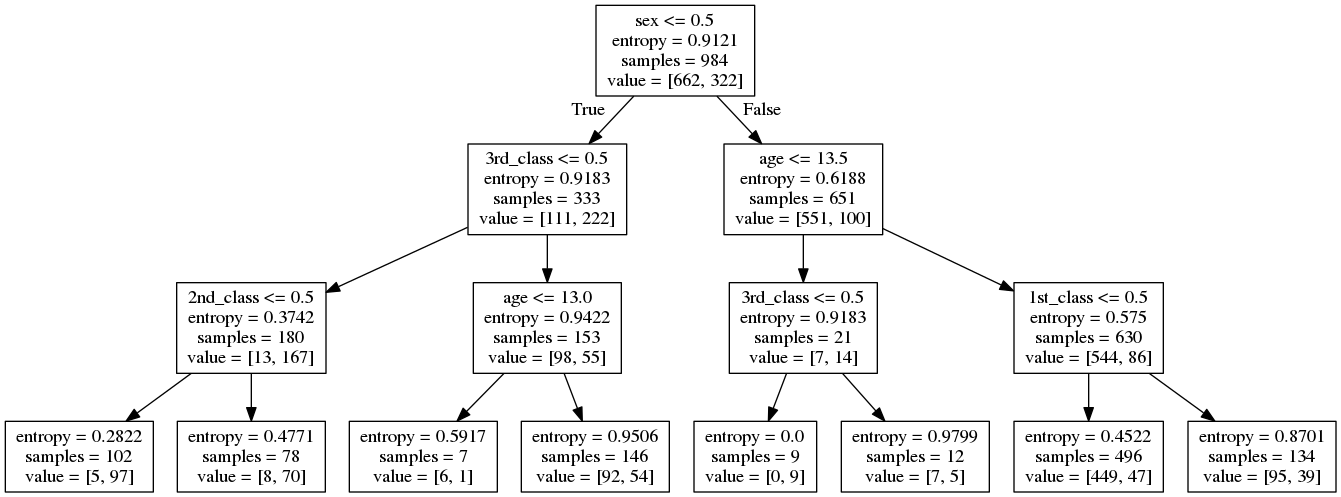

In [107]:
import pydotplus, StringIO
dot_data = StringIO.StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=['age', 'sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
from IPython.core.display import Image
Image(filename='titanic.png')

## Interpreting the decision tree

In [108]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, 
                        show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print "Accuracy: {0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n"
    if show_classification_report:
        print "Classification report:"
        print metrics.classification_report(y, y_pred), "\n"
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred), "\n"
measure_performance(X_train, y_train, clf,
                   show_classification_report=False, show_confusion_matrix=False)

Accuracy: 0.838 



In [109]:
measure_performance(X_train, y_train, clf)

Accuracy: 0.838 

Classification report:
             precision    recall  f1-score   support

          0       0.82      0.98      0.89       662
          1       0.93      0.55      0.69       322

avg / total       0.85      0.84      0.82       984


Confusion matrix
[[649  13]
 [146 176]] 



In [113]:
# leave-one-out cross validation
from sklearn.cross_validation import cross_val_score, LeaveOneOut
from scipy.stats import sem

def loo_cv(X_train, y_train, clf):
    # Perform Leave-One-Out cross validation
    # We are performaing 1313 classifications.
    loo = LeaveOneOut(X_train[:].shape[0])
    scores = np.zeros(X_train[:].shape[0])
    for train_index, test_index in loo:
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        clf = clf.fit(X_train_cv, y_train_cv)
        y_pred = clf.predict(X_test_cv)
        scores[test_index] = metrics.accuracy_score(y_test_cv.astype(int), y_pred.astype(int))
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))

In [114]:
loo_cv(X_train, y_train, clf)

Mean score: 0.837 (+/-0.012)


## Random Forests - randomizing decisions

In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=33)
clf = clf.fit(X_train, y_train)
loo_cv(X_train, y_train, clf)

Mean score: 0.817 (+/-0.012)


Results are worse with Random Forests.  This is likely due to the fact that we have few features.  Random forests "is a very fast, simple, and popular method to improve accuarcy" for bigger datasets with a a bigger number of features.

### Evaluating the performance

In [117]:
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf_dt.fit(X_train, y_train)
measure_performance(X_test, y_test, clf_dt)

Accuracy: 0.793 

Classification report:
             precision    recall  f1-score   support

          0       0.77      0.96      0.85       202
          1       0.88      0.54      0.67       127

avg / total       0.81      0.79      0.78       329


Confusion matrix
[[193   9]
 [ 59  68]] 



## Predicting House Prices with Regression

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
print boston.data.shape

(506, 13)


In [121]:
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [123]:
print np.max(boston.target), np.min(boston.target), np.mean(boston.target)

50.0 5.0 22.5328063241


In [124]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [126]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   test_size=0.25, random_state=33)
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

/home/andrew/python-apps/DataAnalysis/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/andrew/python-apps/DataAnalysis/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/andrew/python-apps/DataAnalysis/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError

In [127]:
from sklearn.cross_validation import *
def train_and_evaluate(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    print "Coefficient of determination on training set:", clf.score(X_train, y_train)
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print "Average coefficient of determination using 5-fold crossvalidation:", np.mean(scores)

### First try - a linear model

In [128]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=42)
train_and_evaluate(clf_sgd, X_train, y_train)

Coefficient of determination on training set: 0.743617732983
Average coefficient of determination using 5-fold crossvalidation: 0.710809853468


In [129]:
print clf_sgd.coef_

[-0.08527595  0.06706144 -0.05032898  0.10874804 -0.07755151  0.38961893
 -0.02485839 -0.20990016  0.08491659 -0.05495108 -0.19854006  0.06126093
 -0.37817963]


In [130]:
# l2 penalty - to avoid overfitting
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', random_state=42)
train_and_evaluate(clf_sgd1, X_train, y_train)

Coefficient of determination on training set: 0.743616743208
Average coefficient of determination using 5-fold crossvalidation: 0.71081206667


### Second try - Support Vector Machines for regression

In [131]:
from sklearn import svm
clf_svr = svm.SVR(kernel='linear')
train_and_evaluate(clf_svr, X_train, y_train)

Coefficient of determination on training set: 0.71886923342
Average coefficient of determination using 5-fold crossvalidation: 0.707838419194


In [132]:
clf_svr_poly = svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly, X_train, y_train)

Coefficient of determination on training set: 0.904109273301
Average coefficient of determination using 5-fold crossvalidation: 0.779288545488


In [133]:
clf_svr_rbf = svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf, X_train, y_train)

Coefficient of determination on training set: 0.900132065979
Average coefficient of determination using 5-fold crossvalidation: 0.833662221567


### Third try - Random Forests revisited

In [135]:
from sklearn import ensemble
clf_et = ensemble.ExtraTreesRegressor(n_estimators=10, random_state=42)
#  compute_importances=True is no longer required
train_and_evaluate(clf_et, X_train, y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.861758978344


In [136]:
print sort(zip(clf_et.feature_importances_, boston.feature_names), axis=0)

[['0.00504385320276' 'AGE']
 ['0.0151425137151' 'B']
 ['0.0170525784005' 'CHAS']
 ['0.0189418210858' 'CRIM']
 ['0.0236025617776' 'DIS']
 ['0.0257330490046' 'INDUS']
 ['0.0318741622351' 'LSTAT']
 ['0.0344056449393' 'NOX']
 ['0.0397131333452' 'PTRATIO']
 ['0.0466185213973' 'RAD']
 ['0.0995118014928' 'RM']
 ['0.284215227964' 'TAX']
 ['0.35814513144' 'ZN']]


## Evaluation

In [147]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"

    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
        
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"
        
    if show_r2_score:
        print "Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n"

        
measure_performance(X_test,y_test,clf_et, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)



Coefficient of determination:0.802 

